## B.1 Importar librerías

In [2]:
import numpy as np
from sklearn.datasets import make_moons, fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pylab as plt
import itertools

## B.2 Creacion de dataset "Two Moons"

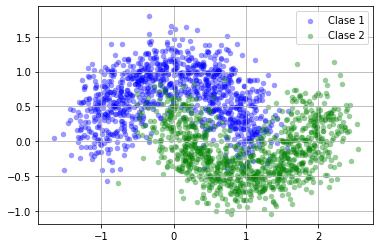

In [3]:
N = 2000
X, Y = make_moons(n_samples=N, noise=0.25)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='b', marker='o', linewidth=0, alpha=0.4, s=30, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='g', marker='o', linewidth=0, alpha=0.4, s=30, label='Clase 2')
plt.grid()
plt.legend()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, stratify=Y)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

## B.3 Support Vector Machine

- Seleccione kernel='linear' y ajuste C $\in [0.1, 1.0, 10.0, 100.0]$
- Seleccione kernel='rbf' y ajuste C y gamma $\in [0.1, 1.0, 10.0, 100.0]$


Area bajo la curva ROC (validation): 0.930374
Area bajo la curva ROC (train): 0.941844
186 SVs para la clase 1
186 SVs para la clase 2


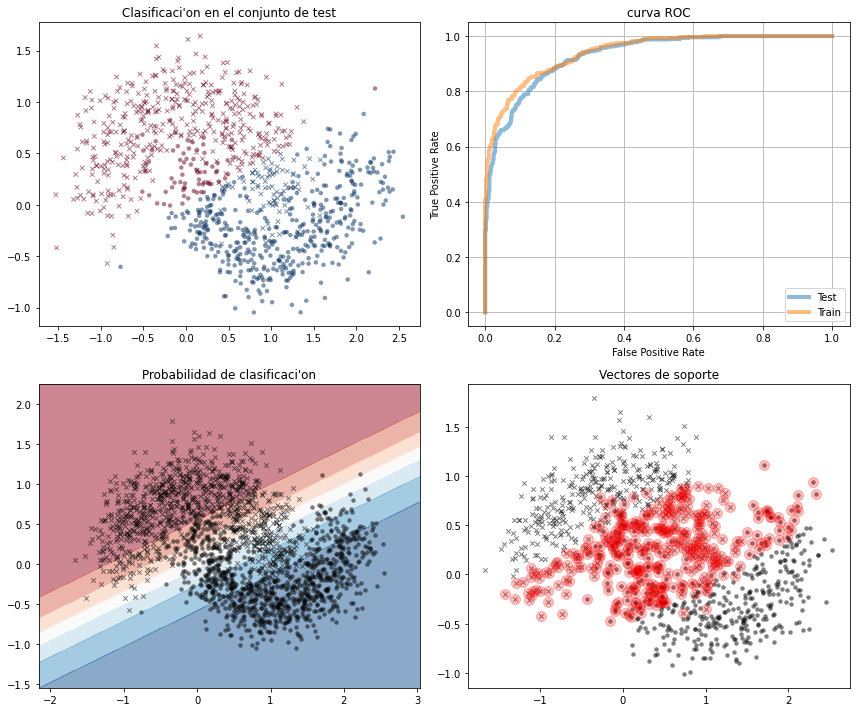

In [4]:
classifier = SVC(C=0.1, kernel='linear', gamma=1.0, probability=True)
classifier.fit(X_train, Y_train)


fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2, 2, 1)
Y_pred = classifier.predict(X_test)
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c=Y_pred[Y_test==0], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c=Y_pred[Y_test==1], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Clasificaci\'on en el conjunto de test')

ax = fig.add_subplot(2, 2, 3)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Probabilidad de clasificaci\'on')

ax = fig.add_subplot(2, 2, 2)
Y_pred = classifier.predict_proba(X_test)
fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC (validation): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC')
plt.grid()

ax = fig.add_subplot(2, 2, 4)
ax.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], c='k', 
           marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], c='k', 
           marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
ax.scatter(X_train[classifier.support_, 0], X_train[classifier.support_, 1], 
           c='r', linewidth=1, alpha=0.25, s=100)
plt.title('Vectores de soporte')

plt.tight_layout()
print("%d SVs para la clase 1" % (classifier.n_support_[0]))
print("%d SVs para la clase 2" % (classifier.n_support_[1]))


In [5]:
ROC_val_lin=[0.938404, 0.939152 , 0.939180 , 0.939174]
ROC_train_lin=[0.933846 , 0.934180 , 0.934164 , 0.934156]
ROC_val_G_Cfijo=[0.945680 , 0.981254 , 0.959800 , 0.952044]
ROC_train_G_Cfijo=[0.941820 , 0.982462 , 0.972980 , 0.988140]
ROC_val_G_gammafijo=[0.974864 , 0.981254 , 0.979506 , 0.974516]
ROC_train_G_gammafijo=[0.974468 , 0.982462 , 0.983352 , 0.981488]
C= [0.1, 1 , 10 , 100]
Gamma = [0.1 , 1 , 10 , 100]
Clog= [np.log(0.1), np.log(1), np.log(10), np.log(10)]

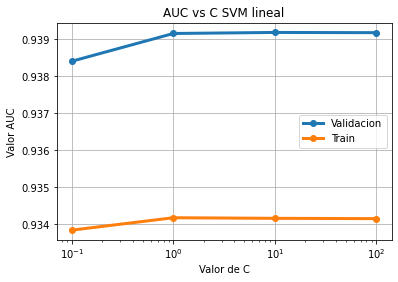

In [6]:
plt.plot(C, ROC_val_lin,'o-', linewidth=3, label='Validacion')
plt.plot(C, ROC_train_lin,'o-', linewidth=3, label='Train')
plt.legend()
plt.xlabel('Valor de C')
plt.ylabel('Valor AUC')
plt.xscale('log')
plt.title('AUC vs C SVM lineal')
plt.grid()

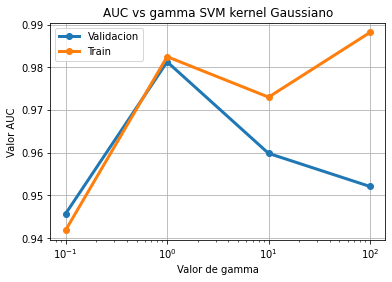

In [7]:
plt.plot(Gamma, ROC_val_G_Cfijo,'o-', linewidth=3, label='Validacion')
plt.plot(Gamma, ROC_train_G_Cfijo,'o-', linewidth=3, label='Train')
plt.legend()
plt.xlabel('Valor de gamma')
plt.ylabel('Valor AUC')
plt.xscale('log')
plt.title('AUC vs gamma SVM kernel Gaussiano')
plt.grid()

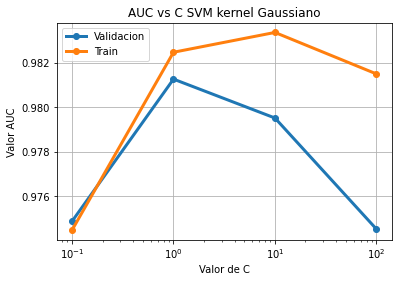

In [8]:
plt.plot(Gamma, ROC_val_G_gammafijo,'o-', linewidth=3, label='Validacion')
plt.plot(Gamma, ROC_train_G_gammafijo,'o-', linewidth=3, label='Train')
plt.legend()
plt.xlabel('Valor de C')
plt.ylabel('Valor AUC')
plt.xscale('log')
plt.title('AUC vs C SVM kernel Gaussiano')
plt.grid()

## B.4 Random Forests

Area bajo la curva ROC (test): 0.971592
Area bajo la curva ROC (train): 0.999932


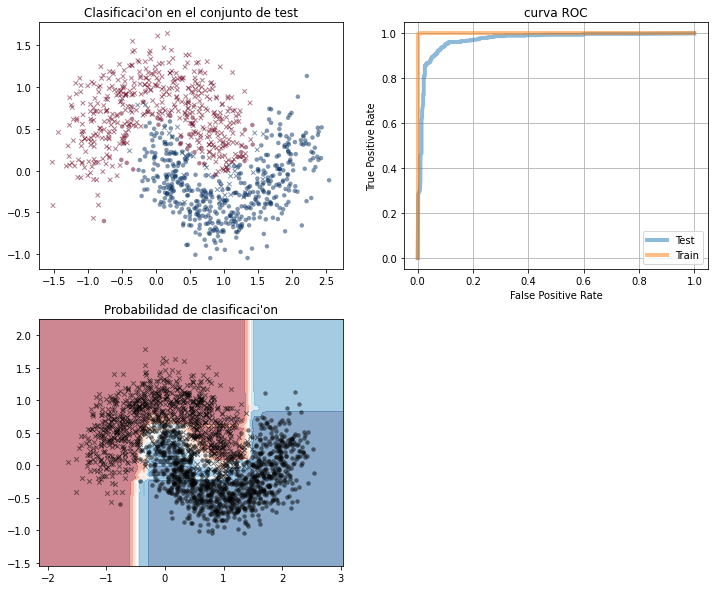

In [9]:
classifier = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1
)
classifier.fit(X_train, Y_train)


fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2, 2, 1)
Y_pred = classifier.predict(X_test)
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c=Y_pred[Y_test==0], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c=Y_pred[Y_test==1], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Clasificaci\'on en el conjunto de test')

ax = fig.add_subplot(2, 2, 3)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Probabilidad de clasificaci\'on')

ax = fig.add_subplot(2, 2, 2)
Y_pred = classifier.predict_proba(X_test)
fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC')
plt.grid()

In [12]:
#train 7 3  0.959966
#train 7 10 0.998882
#train 50 3 0.973860
#train 50 10 0.999964

## B.5 Creacion de dataset "Covertype"

In [13]:
dataset = fetch_covtype()

def dense_to_one_hot(dense):
    a = np.zeros((len(dense), int(np.max(dense))))
    a[np.arange(len(dense)), dense-1] = 1
    return a

X = dataset.data
Y = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)
print('Ejemplos por clase (entrenamiento)')
Y_train_one_hot = dense_to_one_hot(Y_train)
print(Y_train_one_hot.sum(axis=0))

print('Ejemplos por clase (validacion)')
Y_test_one_hot = dense_to_one_hot(Y_test)
print(Y_test_one_hot.sum(axis=0))

Ejemplos por clase (entrenamiento)
[148288. 198310.  25028.   1923.   6645.  12157.  14357.]
Ejemplos por clase (validacion)
[63552. 84991. 10726.   824.  2848.  5210.  6153.]


## B.6 RF para Covertype

Probar con class_weight $\in (\text{"balanced"}, None)$

Dado n_estimators=30, ajustar max_depth $\in [10, 30, 50]$

In [14]:
classifier = RandomForestClassifier(
    n_estimators=30,
    criterion='gini',
    max_depth=30,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced'
)
classifier.fit(X_train, Y_train)

#'balanced'

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

## B.7 performance de RF en Covertype


Promedio recall por clase (validacion) 0.907
Promedio recall por clase (training) 0.999
Numero de ejemplos en validacion clasificados correctamente: 164990

Caracteristicas ordenadas por importancia (RF)
	0.221 Elevation
	0.110 Horizontal distance to roadways
	0.085 Horizontal distance to fire points
	0.062 Horizontal distance to hydrology
	0.051 Vertical distance to hydrology
	0.044 Cache la Poudre Wilderness Area
	0.043 Hillshade 9am
	0.042 Aspect
	0.036 Hillshade noon
	0.035 Hillshade 3pm
	0.030 Slope
	0.024 Soil type 10
	0.023 Soil type 38
	0.022 Soil type 3
	0.022 Rawah Wilderness Area
	0.022 Soil type 39
	0.018 Comanche Peak Wilderness Area
	0.014 Soil type 4
	0.011 Soil type 40
	0.008 Soil type 2
	0.008 Soil type 30
	0.007 Soil type 17
	0.006 Soil type 13
	0.005 Soil type 22
	0.005 Soil type 23
	0.005 Soil type 12
	0.004 Soil type 29
	0.004 Soil type 33
	0.004 Soil type 32
	0.004 Neota Wilderness Area
	0.004 Soil type 11
	0.003 Soil type 6
	0.003 Soil type 35
	0.003 Soil type 2

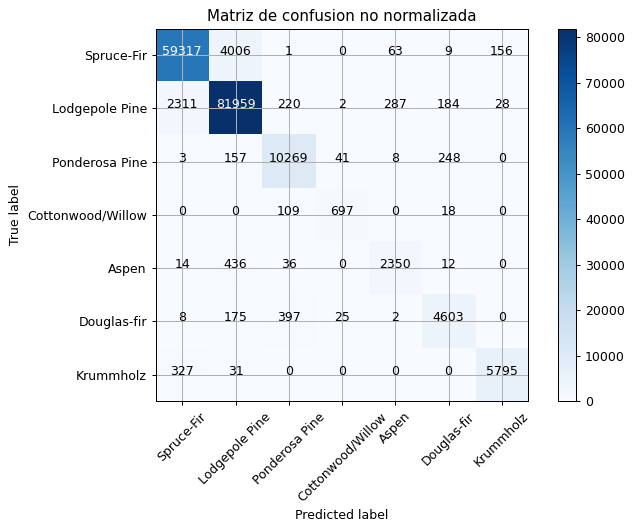

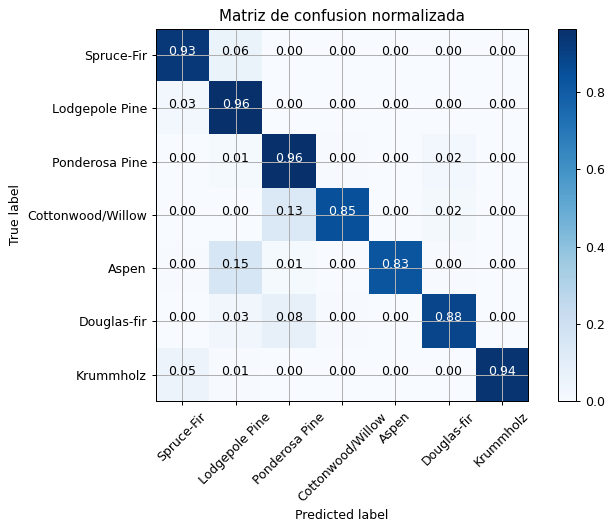

In [15]:
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

def mean_recall(cm):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm.diagonal().mean()

def plot_confusion_matrix(cm, classes,
                          normalized=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Matriz de confusion normalizada'
        fmt = '.2f'
    else:
        title='Matriz de confusion no normalizada'
        fmt = 'd'
        
    plt.figure(figsize=(8, 6), dpi=90)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid('off')
    plt.tight_layout()
target_names = [
    'Spruce-Fir',
    'Lodgepole Pine',
    'Ponderosa Pine',
    'Cottonwood/Willow',
    'Aspen',
    'Douglas-fir',
    'Krummholz'
]
plot_confusion_matrix(cm, target_names, normalized=False)
plot_confusion_matrix(cm, target_names, normalized=True)

print('\nPromedio recall por clase (validacion) %.3f' % mean_recall(cm))
Y_train_pred = classifier.predict(X_train)
train_cm = confusion_matrix(Y_train, Y_train_pred)
print('Promedio recall por clase (training) %.3f' % mean_recall(train_cm))
print('Numero de ejemplos en validacion clasificados correctamente: %d' % accuracy_score(Y_test, Y_pred, normalize=False))
print('\nCaracteristicas ordenadas por importancia (RF)')
feature_importances = classifier.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal distance to hydrology',
    'Vertical distance to hydrology',
    'Horizontal distance to roadways',
    'Hillshade 9am',
    'Hillshade noon',
    'Hillshade 3pm',
    'Horizontal distance to fire points',
    'Rawah Wilderness Area',
    'Neota Wilderness Area',
    'Comanche Peak Wilderness Area',
    'Cache la Poudre Wilderness Area'
] + [('Soil type %d' % (n+1)) for n in range(40)]
for index in importance_order:
    print('\t%.3f %s' % (feature_importances[index], feature_names[index]))

# Programación

In [16]:
import pandas as pd

In [17]:
df= pd.DataFrame(dataset['data'],columns=feature_names)
df['target']= dataset['target']
df

,Elevation,Aspect,Slope,Horizontal distance to hydrology,Vertical distance to hydrology,Horizontal distance to roadways,Hillshade 9am,Hillshade noon,Hillshade 3pm,Horizontal distance to fire points,Rawah Wilderness Area,Neota Wilderness Area,Comanche Peak Wilderness Area,Cache la Poudre Wilderness Area,Soil type 1,Soil type 2,Soil type 3,Soil type 4,Soil type 5,Soil type 6,Soil type 7,Soil type 8,Soil type 9,Soil type 10,Soil type 11,Soil type 12,Soil type 13,Soil type 14,Soil type 15,Soil type 16,Soil type 17,Soil type 18,Soil type 19,Soil type 20,Soil type 21,Soil type 22,Soil type 23,Soil type 24,Soil type 25,Soil type 26,Soil type 27,Soil type 28,Soil type 29,Soil type 30,Soil type 31,Soil type 32,Soil type 33,Soil type 34,Soil type 35,Soil type 36,Soil type 37,Soil type 38,Soil type 39,Soil type 40,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [18]:
reordenar = df.sample(frac=1,random_state=1).reset_index(drop=True)
clase_1=reordenar.loc[reordenar['target'] == 1]
clase_2=reordenar.loc[reordenar['target'] == 2]
clase_3=reordenar.loc[reordenar['target'] == 3]
clase_4=reordenar.loc[reordenar['target'] == 4]
clase_5=reordenar.loc[reordenar['target'] == 5]
clase_6=reordenar.loc[reordenar['target'] == 6]
clase_7=reordenar.loc[reordenar['target'] == 7]
new_covertype= pd.concat([clase_1[:1000],clase_2[:1000],clase_3[:1000],clase_4[:1000],clase_5[:1000],clase_6[:1000],clase_7[:1000]])
new_covertype=new_covertype.sample(frac=1,random_state=1).reset_index(drop=True)

In [19]:
y = new_covertype['target']
X =  new_covertype.iloc[:,:54]
X

,Elevation,Aspect,Slope,Horizontal distance to hydrology,Vertical distance to hydrology,Horizontal distance to roadways,Hillshade 9am,Hillshade noon,Hillshade 3pm,Horizontal distance to fire points,Rawah Wilderness Area,Neota Wilderness Area,Comanche Peak Wilderness Area,Cache la Poudre Wilderness Area,Soil type 1,Soil type 2,Soil type 3,Soil type 4,Soil type 5,Soil type 6,Soil type 7,Soil type 8,Soil type 9,Soil type 10,Soil type 11,Soil type 12,Soil type 13,Soil type 14,Soil type 15,Soil type 16,Soil type 17,Soil type 18,Soil type 19,Soil type 20,Soil type 21,Soil type 22,Soil type 23,Soil type 24,Soil type 25,Soil type 26,Soil type 27,Soil type 28,Soil type 29,Soil type 30,Soil type 31,Soil type 32,Soil type 33,Soil type 34,Soil type 35,Soil type 36,Soil type 37,Soil type 38,Soil type 39,Soil type 40
0,2804.0,164.0,7.0,150.0,16.0,1183.0,227.0,242.0,149.0,1243.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2613.0,144.0,8.0,90.0,2.0,721.0,232.0,239.0,139.0,1460.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2584.0,162.0,20.0,201.0,43.0,484.0,235.0,240.0,126.0,2341.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2784.0,59.0,15.0,30.0,10.0,1860.0,230.0,207.0,106.0,1761.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2827.0,90.0,35.0,228.0,-72.0,270.0,247.0,160.0,11.0,2163.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,3199.0,158.0,15.0,437.0,59.0,860.0,235.0,241.0,133.0,2497.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,2520.0,52.0,24.0,95.0,16.0,1776.0,224.0,182.0,79.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,2308.0,126.0,23.0,277.0,125.0,1308.0,251.0,218.0,83.0,1024.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,3032.0,162.0,12.0,42.0,7.0,1612.0,232.0,243.0,140.0,309.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3, random_state=1, stratify= y)

In [21]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
scaler =scaler.fit(X_train) #Entrenamiento de standardscaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
lastclassifier1 = SVC(C=0.1, kernel='rbf', gamma=1.0, probability=True, decision_function_shape='ovr')
lastclassifier1.fit(X_train, y_train)
y_pred1 = lastclassifier1.predict_proba(X_test)

In [25]:
lastclassifier2 = SVC(C=1, kernel='rbf', gamma=1.0, probability=True, decision_function_shape='ovr')
lastclassifier2.fit(X_train, y_train)
y_pred2 = lastclassifier2.predict_proba(X_test)

In [26]:
lastclassifier3 = SVC(C=10, kernel='rbf', gamma=1.0, probability=True, decision_function_shape='ovr')
lastclassifier3.fit(X_train, y_train)
y_pred3 = lastclassifier3.predict_proba(X_test)

In [27]:
lastclassifier4 = SVC(C=1, kernel='rbf', gamma=0.1, probability=True, decision_function_shape='ovr')
lastclassifier4.fit(X_train, y_train)
y_pred4 = lastclassifier4.predict_proba(X_test)

In [28]:
lastclassifier5 = SVC(C=1, kernel='rbf', gamma=10, probability=True, decision_function_shape='ovr')
lastclassifier5.fit(X_train, y_train)
y_pred5 = lastclassifier5.predict_proba(X_test)

In [29]:
y_test = np.array(y_test)

In [30]:
pred1=[]
for elemento in y_pred1:
  pred1.append(np.where(elemento==elemento.max())[0][0]+1)
pred1
cm1 = confusion_matrix(y_test,pred1)
recall1 = mean_recall(cm1)
aciertos=0

for i in range(len(pred1)):
    if pred1[i] - y_test[i] == 0.0:
        aciertos+=1
    else: 
      None


print(f'recall promedio {recall1}')
print(f'tasa de aciertos {aciertos/2100 }')



recall promedio 0.6038095238095238
tasa de aciertos 0.6038095238095238


In [31]:
pred2=[]
for elemento in y_pred2:
  pred2.append(np.where(elemento==elemento.max())[0][0]+1)
cm2 = confusion_matrix(y_test,pred2)
recall2 = mean_recall(cm2)
aciertos=0

for i in range(len(pred2)):
    if pred2[i] - y_test[i] == 0.0:
        aciertos+=1
    else: 
      None


print(f'recall promedio {recall2}')
print(f'tasa de aciertos {aciertos/2100 }')

recall promedio 0.760952380952381
tasa de aciertos 0.7609523809523809


In [32]:
pred3=[]
for elemento in y_pred3:
  pred3.append(np.where(elemento==elemento.max())[0][0]+1)

cm3 = confusion_matrix(y_test,pred3)
recall3 = mean_recall(cm3)
aciertos=0

for i in range(len(pred3)):
    if pred3[i] - y_test[i] == 0.0:
        aciertos+=1
    else: 
      None


print(f'recall promedio {recall3}')
print(f'tasa de aciertos {aciertos/2100 }')

recall promedio 0.758095238095238
tasa de aciertos 0.758095238095238


In [33]:
pred4=[]
for elemento in y_pred4:
  pred4.append(np.where(elemento==elemento.max())[0][0]+1)

cm4 = confusion_matrix(y_test,pred4)
recall4 = mean_recall(cm4)
aciertos=0

for i in range(len(pred4)):
    if pred4[i] - y_test[i] == 0.0:
        aciertos+=1
    else: 
      None


print(f'recall promedio {recall4}')
print(f'tasa de aciertos {aciertos/2100 }')

recall promedio 0.7304761904761905
tasa de aciertos 0.7304761904761905


In [34]:
pred5=[]
for elemento in y_pred5:
  pred5.append(np.where(elemento==elemento.max())[0][0]+1)

cm5 = confusion_matrix(y_test,pred5)
recall5 = mean_recall(cm5)
aciertos=0

for i in range(len(pred5)):
    if pred5[i] - y_test[i] == 0.0:
        aciertos+=1
    else: 
      None


print(f'recall promedio {recall5}')
print(f'tasa de aciertos {aciertos/2100 }')

recall promedio 0.4923809523809524
tasa de aciertos 0.49238095238095236


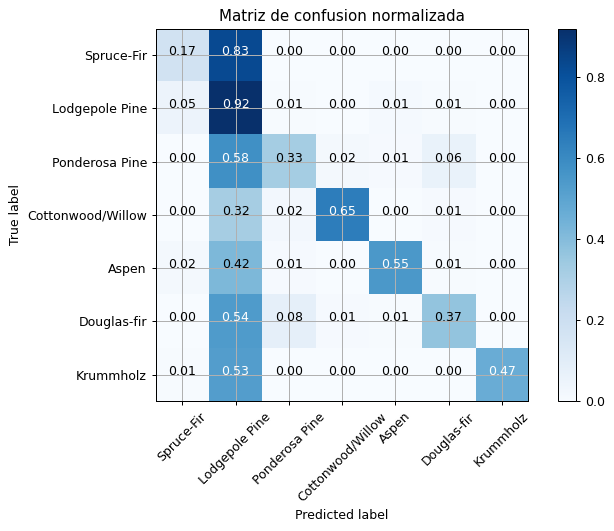

In [35]:
plot_confusion_matrix(cm5, target_names, normalized=True)